**Problem Statement**

For the business, absenteeism means a loss of production and high-quality work. If organization can somehow predict the amount of time employee are to remain absent, It can help businesses plan tasks effectively to maximize productivity and prevent stressful situations for the business and its personnel.



**Data Source**

UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work).



**Brief Description**

1. Absenteeism leads to loss of productive work leading to direct loss of the business of a company. Absenteeism can be due to medical reasons, personal reasons or unforeseen circumstances. The dataset is of a courier company.


2. In this project we will attempt to predict the no of hours an employee can remain absent during worktime; it will aid organizations in figuring out the ways to reduce absenteeism time of employees and also help them get the loss they would make due to employee being absent from work.


3. Dataset that we are going to use contains 740 entries and is heavily skewed, so it would require a great deal to preprocessing, sampling before we could apply any of the data mining algorithm to it.


4. Dataset has 21 attributes pertaining to employee medical history, family conditions, workload, financial conditions etc.



**Team Members**

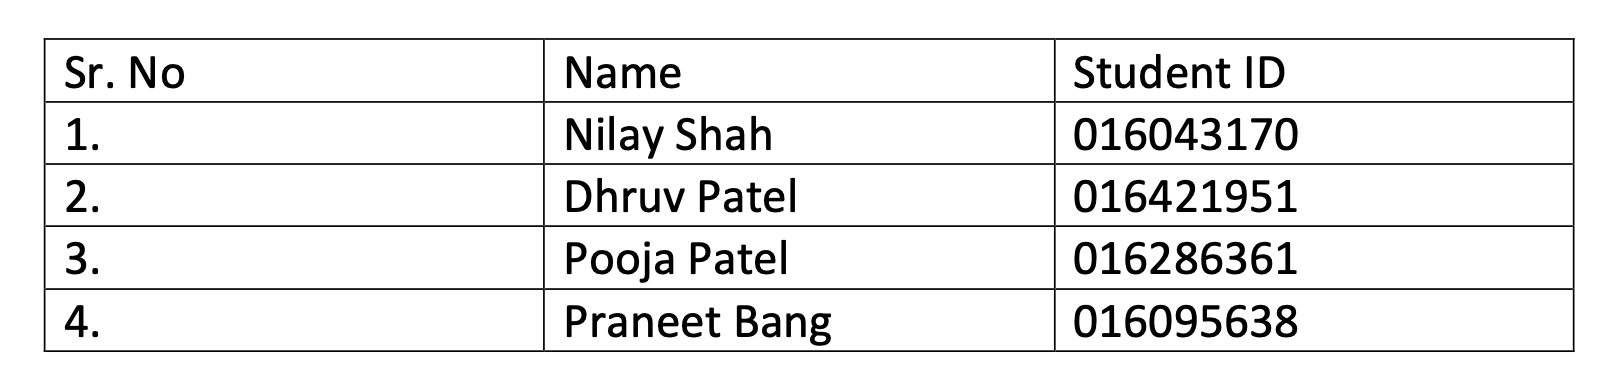



**Task**

Importing the data, the data file is xls file we will import it as .csv file into pandas dataframe.

In [1]:
#initiate a pydrive client to make secure connection to google-drive and access the data
!pip install PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#File Access Url -- #https://docs.google.com/spreadsheets/d/11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN/edit?usp=sharing&ouid=114733957030923857297&rtpof=true&sd=true.
#File Id -- 11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN.

#making connection to google drive to access the data set file.
dataurl = 'https://docs.google.com/spreadsheets/d/11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN/edit?usp=share_link&ouid=114733957030923857297&rtpof=true&sd=true'

#authenticater and create a pydrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
google_drive = GoogleDrive(gauth)

#get the dataset file.
downloadedfile = google_drive.CreateFile({'id':"11y1sWMXMJIO4nFRhOf5yARP5j1gAZTyN"})  #id is present in the link.
downloadedfile.GetContentFile('Absenteeism_at_work.xls') #access the file with name.

#Import All Libraries below.

**Section-1**

1. Data Exploration and Visualization




In [3]:
#Importing required libraries for data visualization.
import pandas as pd					
import numpy as np					

import seaborn as sns				
import matplotlib.pyplot as plt		
from numpy import random
%matplotlib inline


In [4]:
#importing necessary libraries
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dimensionality and oversampling
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

# models 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

SEED = 42
random.seed(SEED)


In [5]:
##read the data into "absent_data" pandas data frame 
#absent_data = pd.read_excel("Absenteeism_at_work.xls")
absent_data = pd.read_excel("Absenteeism_at_work.xls")



In [6]:
#print the data head
absent_data.head(15)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,NaN,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,NaN,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3.0,23.0,7.0,6.0,1.0,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20.0,23.0,7.0,6.0,1.0,NaN,50.0,11.0,36.0,239554.0,...,NaN,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [7]:
#statistics about the data
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,736.000000,737.000000,737.000000,730.000000,...,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,737.00000,734.000000,731.000000,740.000000
mean,18.017568,19.230665,6.316644,3.914865,2.544595,221.218281,29.605978,12.559023,36.398915,271609.242466,...,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.02578,172.092643,26.688098,6.924324
std,11.021247,8.440874,3.432253,1.421675,1.111831,66.777780,14.818895,4.388672,6.422904,39174.793581,...,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.88750,5.993368,4.298915,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.00000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.00000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.00000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.00000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.00000,196.000000,38.000000,120.000000


In [8]:
#Information about the data types of each col in the dataset
absent_data.info()

#Below data represents the Non-Null entries in each of the 21 Columns, We can see
# that there are Null Values which need to be imputed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  736 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [9]:
#Shape of the data
# data has 740 rows and 21  
print("Shape of the pandas data is {}" . format(absent_data.shape))

Shape of the pandas data is (740, 21)


In [10]:
#print the total Columns
print("Total Columns" , absent_data.columns)
print("-"*80)
print("Total number of Columns is : {}" .format(len(absent_data.columns)))

Total Columns Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
--------------------------------------------------------------------------------
Total number of Columns is : 21


#Final Data Shape
The data contains **740** data points and **21** features.


In [11]:
#Finding the missing values percentasge
absent_data.isna().sum()
Missing_Value = pd.DataFrame((absent_data.isna().sum()/len(absent_data)*100))

Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value


,Missing_percentage
Work load Average/day,1.351351
Body mass index,1.216216
Transportation expense,0.945946
Hit target,0.810811
Height,0.810811
Education,0.810811
Disciplinary failure,0.810811
Social drinker,0.675676
Son,0.540541
Pet,0.540541


In [12]:
#ID, Day fo the week, Seasons shlould be int and is float convert it to int64
absent_data['ID'] = absent_data['ID'].astype('int')
absent_data['Day of the week'] = absent_data['Day of the week'].astype('int')
absent_data['Seasons'] = absent_data['Seasons'].astype('int')
absent_data['Work load Average/day '] = absent_data['Work load Average/day '].astype('object')


As we can see Column "Work load Average/day " contains extra space at the end so we need to rename the column.

In [13]:
absent_data.rename(columns = {'Work load Average/day ':'Work load Average/day'}, inplace = True)
absent_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  736 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [14]:
#Printing total amount of Null values in all the columns
absent_data.isnull().sum()



ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              3
Height                              6
Body mass index                     9
Absenteeism time in hours           0
dtype: int64

##Dealing With Missing Values in Column "Reason for absence"

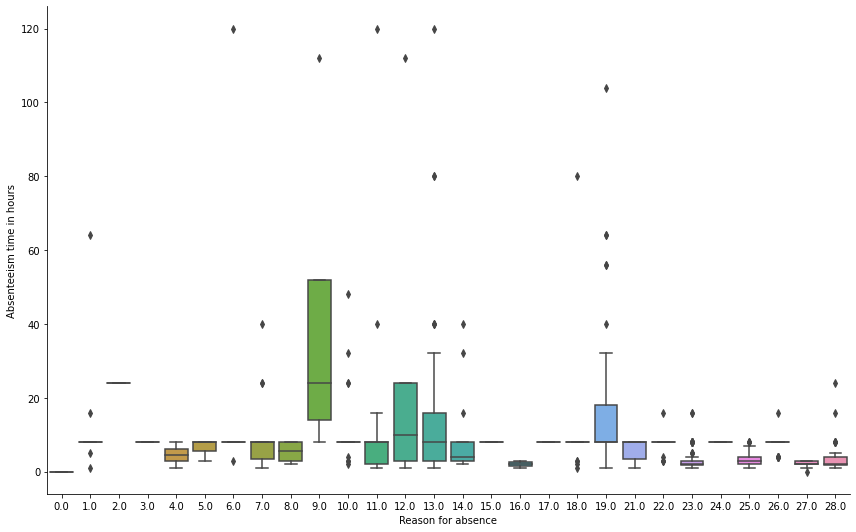

In [15]:
#printCategory plot for Reason of absence and Abseetism time in hours.
# we will print the co-relation between Reson for absence and Abseetidm time in hours.
sns.catplot(x='Reason for absence', y="Absenteeism time in hours", kind="box", data=absent_data,height=7.5,aspect=12/7.5)


In [16]:
print(absent_data[absent_data["Reason for absence"].isnull()])

     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
80    3                 NaN              11.0                5        4   
160  20                 NaN               3.0                4        2   
225   3                 NaN               6.0                2        3   

     Transportation expense  Distance from Residence to Work  Service time  \
80                    179.0                             51.0          18.0   
160                     NaN                             50.0          11.0   
225                   179.0                             51.0          18.0   

      Age Work load Average/day  ...  Disciplinary failure  Education  Son  \
80   38.0              306345.0  ...                   0.0        1.0  0.0   
160  36.0              343253.0  ...                   0.0        1.0  4.0   
225  38.0              377550.0  ...                   0.0        1.0  0.0   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index 

We have 3 Null values in Reason for Absence Column , With Corresponding Abseetism Time in Hours as 8.0 and 1.0 so we will impute missing values using the following logic.

Missing Val in ["Reason for absence"] with Corresponding "Abseentism Time in Hours" = 8.0 or 1.0 impute it with Max("Reason for absence" with value in Abseentism Time in Hours 8.0 or 1.0)

In [17]:
vals = absent_data.where(absent_data["Absenteeism time in hours"] == 8.0)

In [18]:
selected_rows = vals[~vals['ID'].isnull()]
selected_rows

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
6,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
9,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
10,20.0,1.0,7.0,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
11,20.0,1.0,7.0,3.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
12,20.0,11.0,7.0,4.0,1.0,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,12.0,22.0,6.0,5.0,1.0,233.0,51.0,1.0,31.0,275089.0,...,0.0,2.0,1.0,1.0,0.0,8.0,68.0,178.0,21.0,8.0
727,9.0,6.0,7.0,2.0,1.0,228.0,14.0,16.0,58.0,NaN,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,8.0
732,10.0,22.0,7.0,4.0,1.0,361.0,52.0,3.0,28.0,264604.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
733,28.0,22.0,7.0,4.0,1.0,225.0,26.0,9.0,28.0,264604.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.0


In [19]:
print("Max Values of Column Reason for absence with Abseentism time in hours == 8.0")
print(selected_rows['Reason for absence'].value_counts())

Max Values of Column Reason for absence with Abseentism time in hours == 8.0
22.0    33
26.0    24
13.0    20
19.0    19
10.0    17
18.0    16
1.0     12
23.0    11
11.0     9
28.0     6
14.0     6
6.0      6
7.0      5
21.0     4
25.0     4
24.0     3
8.0      3
5.0      2
15.0     2
17.0     1
4.0      1
3.0      1
9.0      1
Name: Reason for absence, dtype: int64


In [20]:
#As we can see that "22.0" is the maximum reason for absence with Abssentism Hour of 8 hours, we will replace the correspoding
# null values with NaN.
absent_data.loc[(absent_data['Absenteeism time in hours'] == 8.0),'Reason for absence'] = 22.0


In [21]:

vals1 = absent_data.where(absent_data["Absenteeism time in hours"] == 1.0)
selected_rows1 = vals1[~vals1['ID'].isnull()]
selected_rows1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
13,3.0,11.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
21,3.0,11.0,8.0,2.0,1.0,179.0,51.0,18.0,38.0,205917.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
26,11.0,23.0,8.0,3.0,1.0,289.0,36.0,13.0,33.0,205917.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,1.0
35,10.0,23.0,8.0,2.0,1.0,361.0,52.0,3.0,28.0,205917.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,NaN,1.0
59,33.0,23.0,9.0,6.0,4.0,248.0,25.0,14.0,47.0,241476.0,...,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,22.0,13.0,12.0,6.0,4.0,179.0,26.0,9.0,30.0,280549.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0,1.0
679,22.0,13.0,5.0,5.0,3.0,179.0,26.0,9.0,30.0,237656.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0,1.0
687,34.0,28.0,5.0,3.0,3.0,118.0,10.0,10.0,37.0,237656.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,1.0
691,17.0,16.0,5.0,6.0,3.0,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,1.0


In [22]:
print("Max Values of Each Columns with Abseentism time in hours == 1.0")
print(selected_rows1['Reason for absence'].value_counts())

Max Values of Each Columns with Abseentism time in hours == 1.0
23.0    37
28.0    28
13.0     6
11.0     5
27.0     2
19.0     1
12.0     1
18.0     1
7.0      1
25.0     1
4.0      1
1.0      1
21.0     1
16.0     1
Name: Reason for absence, dtype: int64


In [23]:
#As we can see that "22.0" is the maximum reason for absence with Abssentism Hour of 8 hours, we will replace the correspoding
# null values with NaN.
absent_data.loc[(absent_data['Absenteeism time in hours'] == 1.0),'Reason for absence'] = 23.0

In [24]:
absent_data.isnull().sum()
#As we can see that Reason for absence has no missing values now we have imputed the missing values

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              3
Height                              6
Body mass index                     9
Absenteeism time in hours           0
dtype: int64

In [25]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,739.000000,740.000000,740.000000,733.000000,736.000000,737.000000,737.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,737.00000,734.000000,731.000000,740.000000
mean,18.017568,20.755405,6.316644,3.914865,2.544595,221.218281,29.605978,12.559023,36.398915,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.02578,172.092643,26.688098,6.924324
std,11.021247,7.071903,3.432253,1.421675,1.111831,66.777780,14.818895,4.388672,6.422904,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.88750,5.993368,4.298915,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.00000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.00000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.00000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.00000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.00000,196.000000,38.000000,120.000000


## Dealing missing values in weight, height and body mass index

In [26]:
weights = absent_data[absent_data['Weight'].isnull()]
weights.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,NaN,170.0,31.0,2.0
212,11,13.0,5.0,4,3,289.0,36.0,13.0,33.0,378884.0,...,0.0,1.0,2.0,1.0,0.0,1.0,NaN,172.0,30.0,24.0
335,20,22.0,11.0,6,4,260.0,50.0,11.0,36.0,284031.0,...,0.0,1.0,4.0,1.0,0.0,0.0,NaN,168.0,23.0,8.0


In [27]:
# we notice that where weight is null, we have body mass index available for the record
# weight = body mass index * (height*height) where height is in metres. Hence we can substitute missing values for the weights with this formula

absent_data['Weight'].fillna(round(absent_data['Body mass index']*((absent_data['Height']**2))/10000), inplace=True)
print(absent_data['Weight'].isnull().sum())
absent_data.iloc[16:17]

0


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,90.0,170.0,31.0,2.0


In [28]:
heights = absent_data[absent_data['Height'].isnull()]
heights.head()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
319,3,22.0,11.0,3,4,179.0,51.0,18.0,38.0,284031.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,8.0
327,34,11.0,11.0,4,4,118.0,10.0,10.0,37.0,284031.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,NaN,28.0,3.0
487,3,25.0,8.0,2,1,179.0,51.0,18.0,38.0,249797.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,NaN,31.0,4.0
573,17,25.0,1.0,6,2,179.0,22.0,17.0,40.0,313532.0,...,0.0,2.0,2.0,0.0,1.0,0.0,63.0,NaN,22.0,2.0
659,22,27.0,4.0,6,3,179.0,26.0,9.0,30.0,246288.0,...,0.0,3.0,0.0,0.0,0.0,0.0,56.0,NaN,19.0,2.0


In [29]:
# we notice that where height is null, we have body mass index available for the record
# height = sqrt(weight / body mass index height) where weight is in kg. Hence we can substitute missing values for the heights with this formula.

absent_data['Height'].fillna( round(np.sqrt(absent_data['Weight'] / absent_data['Body mass index'])*100), inplace=True)
absent_data['Height'].isnull().sum()

0

In [30]:
absent_data.iloc[319:320]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
319,3,22.0,11.0,3,4,179.0,51.0,18.0,38.0,284031.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,169.0,31.0,8.0


In [31]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     9
Absenteeism time in hours           0
dtype: int64

In [32]:
# we see that wheverever BMI is null, we have weight and height available. so we can compute bmi based on that, and fill the na values.
bmi = absent_data[absent_data['Body mass index'].isnull()]
bmi

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
12,20,22.0,7.0,4,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,NaN,8.0
35,10,23.0,8.0,2,1,361.0,52.0,3.0,28.0,205917.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,NaN,1.0
101,1,22.0,12.0,4,4,235.0,11.0,14.0,37.0,261306.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,NaN,8.0
111,24,22.0,12.0,6,2,246.0,25.0,16.0,41.0,261306.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,8.0
127,34,27.0,1.0,2,2,118.0,10.0,10.0,37.0,308593.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,NaN,2.0
138,24,22.0,2.0,4,2,246.0,25.0,16.0,41.0,302585.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,8.0
153,28,23.0,2.0,4,2,225.0,26.0,9.0,28.0,302585.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,NaN,1.0
181,28,28.0,3.0,6,3,225.0,26.0,9.0,28.0,343253.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,NaN,2.0
263,36,13.0,8.0,5,1,118.0,13.0,18.0,50.0,265615.0,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,NaN,3.0


In [33]:
absent_data['Body mass index'].fillna(round(absent_data['Weight']/((absent_data['Height']**2)/10000)), inplace=True)

In [34]:
absent_data.iloc[263:264, :]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
263,36,13.0,8.0,5,1,118.0,13.0,18.0,50.0,265615.0,...,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,3.0


In [35]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [36]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,739.000000,740.000000,740.000000,733.000000,736.000000,737.000000,737.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.316644,3.914865,2.544595,221.218281,29.605978,12.559023,36.398915,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.432253,1.421675,1.111831,66.777780,14.818895,4.388672,6.422904,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing and 0 values in Month column

In [37]:
moa = absent_data[absent_data['Month of absence'].isnull()]
moa

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
104,34,19.0,NaN,3,4,118.0,10.0,10.0,37.0,261306.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,56.0


In [38]:
absent_data['Month of absence'].value_counts()

3.0     87
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
0.0      3
Name: Month of absence, dtype: int64

In [39]:
## replacing null values and 0 values with the mode of the data i.e. 3
absent_data['Month of absence'].fillna( 3, inplace=True)

In [40]:
absent_data['Month of absence'].value_counts()

3.0     88
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
0.0      3
Name: Month of absence, dtype: int64

In [41]:
absent_data['Month of absence'].replace(0, 3, inplace = True)

In [42]:
absent_data['Month of absence'].value_counts()

3.0     91
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    48
Name: Month of absence, dtype: int64

In [43]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [44]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,733.000000,736.000000,737.000000,737.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.218281,29.605978,12.559023,36.398915,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.777780,14.818895,4.388672,6.422904,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in Transportation expense and Distance from residence to work.
##Expense is proportional to the distance from work

In [45]:
## examining distance from work and expense occurred
distance_expense = absent_data[['ID','Distance from Residence to Work', 'Transportation expense']]
distance_expense.groupby(['Distance from Residence to Work', 'Transportation expense']).size()

Distance from Residence to Work  Transportation expense
5.0                              279.0                       6
10.0                             118.0                      53
11.0                             235.0                      23
                                 268.0                       3
12.0                             155.0                      29
13.0                             118.0                      33
14.0                             118.0                       1
                                 228.0                       8
15.0                             118.0                       2
                                 225.0                       4
                                 388.0                       3
16.0                             235.0                      10
                                 330.0                      16
17.0                             369.0                      15
20.0                             235.0                      19

In [46]:
distance_expense[distance_expense['Transportation expense'].isnull()]

,ID,Distance from Residence to Work,Transportation expense
7,20,50.0,NaN
63,34,10.0,NaN
88,28,26.0,NaN
109,10,52.0,NaN
130,11,36.0,NaN
160,20,50.0,NaN
231,36,13.0,NaN


In [47]:
tmp = distance_expense[distance_expense['Transportation expense'].isnull()]
tmp_list = set(tmp['Distance from Residence to Work'].tolist())
print(tmp_list)

for dist in tmp_list:
  absent_data.loc[(absent_data['Transportation expense'].isnull()) & (absent_data['Distance from Residence to Work']==dist), \
                       'Transportation expense'] = absent_data.loc[absent_data['Distance from Residence to Work']==dist, 'Transportation expense'].mode()[0]


{36.0, 10.0, 13.0, 50.0, 52.0, 26.0}


In [48]:
absent_data.groupby(['Distance from Residence to Work', 'Transportation expense']).size()

Distance from Residence to Work  Transportation expense
5.0                              279.0                       6
10.0                             118.0                      54
11.0                             235.0                      23
                                 268.0                       3
12.0                             155.0                      29
13.0                             118.0                      34
14.0                             118.0                       1
                                 228.0                       8
15.0                             118.0                       2
                                 225.0                       4
                                 388.0                       3
16.0                             235.0                      10
                                 330.0                      16
17.0                             369.0                      15
20.0                             235.0                      19

In [49]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     4
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [50]:
## examining distance from work and expense occurred
distance_expense = absent_data[['ID','Distance from Residence to Work', 'Transportation expense']]
distance_expense.groupby([  'Transportation expense', 'Distance from Residence to Work']).size()

Transportation expense  Distance from Residence to Work
118.0                   10.0                                54
                        13.0                                34
                        14.0                                 1
                        15.0                                 2
155.0                   12.0                                29
157.0                   27.0                                 7
179.0                   22.0                                20
                        26.0                                45
                        45.0                                 1
                        51.0                               112
184.0                   42.0                                 7
189.0                   29.0                                 8
225.0                   15.0                                 4
                        26.0                                77
228.0                   14.0                                 8

In [51]:
distance_expense[distance_expense['Distance from Residence to Work'].isnull()]

,ID,Distance from Residence to Work,Transportation expense
57,3,NaN,179.0
166,20,NaN,260.0
707,22,NaN,179.0
722,34,NaN,118.0


In [52]:
tmp = distance_expense[distance_expense['Distance from Residence to Work'].isnull()]
tmp_list = set(tmp['Transportation expense'].tolist())
print(tmp_list)

for exp in tmp_list:
  absent_data.loc[(absent_data['Distance from Residence to Work'].isnull()) & (absent_data['Transportation expense']==exp),'Distance from Residence to Work'] = \
  absent_data.loc[absent_data['Transportation expense']==exp, 'Distance from Residence to Work'].mode()[0]

{179.0, 260.0, 118.0}


In [53]:
absent_data.groupby(['Transportation expense', 'Distance from Residence to Work']).size()

Transportation expense  Distance from Residence to Work
118.0                   10.0                                55
                        13.0                                34
                        14.0                                 1
                        15.0                                 2
155.0                   12.0                                29
157.0                   27.0                                 7
179.0                   22.0                                20
                        26.0                                45
                        45.0                                 1
                        51.0                               114
184.0                   42.0                                 7
189.0                   29.0                                 8
225.0                   15.0                                 4
                        26.0                                77
228.0                   14.0                                 8

In [54]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [55]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,737.000000,737.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.559023,36.398915,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.388672,6.422904,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in Service time column

In [56]:
service_time = absent_data[absent_data['Service time'].isnull()]
service_time

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
3,7,7.0,7.0,5,1,279.0,5.0,NaN,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
18,6,22.0,7.0,5,1,189.0,29.0,NaN,33.0,239554.0,...,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0
137,27,23.0,2.0,6,2,184.0,42.0,NaN,27.0,302585.0,...,0.0,1.0,NaN,0.0,0.0,0.0,58.0,167.0,21.0,1.0


In [57]:
absent_data.groupby(['ID', 'Service time']).size()

ID  Service time
1   14.0             23
2   12.0              6
3   18.0            113
4   13.0              1
5   13.0             19
6   13.0              7
7   14.0              5
8   14.0              2
9   16.0              8
10  3.0              24
11  13.0             40
12  1.0               7
13  12.0             15
14  14.0             29
15  12.0             37
16  24.0              2
17  17.0             20
18  4.0              16
19  12.0              3
20  11.0             42
21  8.0               3
22  9.0              46
23  11.0              8
24  16.0             30
25  8.0              10
26  13.0              5
27  7.0               6
28  9.0              76
29  9.0               1
    15.0              4
30  6.0               7
31  9.0               3
32  29.0              5
33  14.0             24
34  10.0             55
35  14.0              1
36  18.0             34
dtype: int64

In [58]:
tmp_list = absent_data.loc[absent_data['Service time'].isnull(), 'ID'].tolist()
tmp_list = set(tmp_list)
print(tmp_list)

for id in tmp_list:
  absent_data.loc[(absent_data['Service time'].isnull()) & (absent_data['ID']==id),'Service time'] = \
  absent_data.loc[absent_data['ID']==id, 'Service time'].mode()[0]


{27, 6, 7}


In [59]:
absent_data.groupby(['ID', 'Service time']).size()

ID  Service time
1   14.0             23
2   12.0              6
3   18.0            113
4   13.0              1
5   13.0             19
6   13.0              8
7   14.0              6
8   14.0              2
9   16.0              8
10  3.0              24
11  13.0             40
12  1.0               7
13  12.0             15
14  14.0             29
15  12.0             37
16  24.0              2
17  17.0             20
18  4.0              16
19  12.0              3
20  11.0             42
21  8.0               3
22  9.0              46
23  11.0              8
24  16.0             30
25  8.0              10
26  13.0              5
27  7.0               7
28  9.0              76
29  9.0               1
    15.0              4
30  6.0               7
31  9.0               3
32  29.0              5
33  14.0             24
34  10.0             55
35  14.0              1
36  18.0             34
dtype: int64

In [60]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [61]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,737.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.398915,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.422904,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in the age column

In [62]:
absent_data[absent_data['Age'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
144,31,22.0,2.0,2,2,388.0,15.0,9.0,NaN,302585.0,...,0.0,1.0,0.0,0.0,0.0,0.0,76.0,178.0,24.0,8.0
276,8,0.0,9.0,3,1,231.0,35.0,14.0,NaN,294217.0,...,1.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
729,9,6.0,7.0,3,1,228.0,14.0,16.0,NaN,264604.0,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,120.0


###Age is null for ids: 8, 9, 31.
###Lets examine if age is populated against these ids for other rows.

In [63]:
absent_data[['ID', 'Age']].groupby(['ID', 'Age']).size()

ID  Age 
1   37.0     23
2   48.0      6
3   38.0    113
4   40.0      1
5   43.0     19
6   33.0      8
7   39.0      6
8   39.0      1
9   58.0      7
10  28.0     24
11  33.0     40
12  31.0      7
13  31.0     15
14  34.0     29
15  40.0     37
16  46.0      2
17  40.0     20
18  28.0     16
19  32.0      3
20  36.0     42
21  33.0      3
22  30.0     46
23  36.0      8
24  41.0     30
25  32.0     10
26  43.0      5
27  27.0      7
28  28.0     76
29  28.0      1
    41.0      4
30  29.0      7
31  50.0      2
32  49.0      5
33  47.0     24
34  37.0     55
35  53.0      1
36  50.0     34
dtype: int64

###We see that the non-null age for IDs: 8, 9 and 31 is 39, 58 and 50. Thus we can impute these values against these ids, for the missing records.

In [64]:
ids = absent_data.loc[absent_data['Age'].isnull(), 'ID'].tolist()
ids = set(ids)
print(ids)

{8, 9, 31}


In [65]:
for id in ids:
  absent_data.loc[(absent_data['Age'].isnull()) & (absent_data['ID']==id),'Age'] = \
  absent_data.loc[absent_data['ID']==id, 'Age'].mode()[0]


In [66]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [67]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,734.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.053134,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.224453,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in Disciplinary failure column

In [68]:
absent_data['Disciplinary failure'].value_counts()

0.0    695
1.0     39
Name: Disciplinary failure, dtype: int64

###The mode is 0 by a huge margin, so we can impute the missing values with 0

In [69]:
absent_data['Disciplinary failure'].fillna(0, inplace=True)

In [70]:
absent_data['Disciplinary failure'].value_counts()

0.0    701
1.0     39
Name: Disciplinary failure, dtype: int64

In [71]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           6
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [72]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,734.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291553,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.672605,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in Education column

In [73]:
edu = absent_data[absent_data['Education'].isnull()]

In [74]:
ids = absent_data.loc[absent_data['Education'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{10, 11, 20, 22, 28, 33}

In [75]:
for id in ids:
  absent_data.loc[(absent_data['Education'].isnull()) & (absent_data['ID']==id),'Education'] = \
  absent_data.loc[absent_data['ID']==id, 'Education'].mode()[0]

In [76]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 4
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [77]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,740.000000,736.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291892,1.021739,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.673238,1.098950,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in Son column

In [78]:
absent_data[absent_data['Son'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
124,34,27.0,1.0,4,2,118.0,10.0,10.0,37.0,308593.0,...,0.0,1.0,NaN,0.0,0.0,0.0,83.0,172.0,28.0,2.0
137,27,23.0,2.0,6,2,184.0,42.0,7.0,27.0,302585.0,...,0.0,1.0,NaN,0.0,0.0,0.0,58.0,167.0,21.0,1.0
155,19,28.0,3.0,3,2,291.0,50.0,12.0,32.0,343253.0,...,0.0,1.0,NaN,1.0,0.0,0.0,65.0,169.0,23.0,2.0
198,11,22.0,4.0,3,3,289.0,36.0,13.0,33.0,326452.0,...,0.0,1.0,NaN,1.0,0.0,1.0,90.0,172.0,30.0,8.0


In [79]:
ids = absent_data.loc[absent_data['Son'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{11, 19, 27, 34}

In [80]:
for id in ids:
  absent_data.loc[(absent_data['Son'].isnull()) & (absent_data['ID']==id),'Son'] = \
  absent_data.loc[absent_data['ID']==id, 'Son'].mode()[0]

In [81]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      5
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [82]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,740.000000,740.000000,735.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291892,1.018919,0.565986,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.673238,1.098489,0.495964,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in the Social drinker column

In [83]:
absent_data[absent_data['Social drinker'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
141,6,22.0,2.0,5,2,189.0,29.0,13.0,33.0,302585.0,...,0.0,1.0,2.0,NaN,0.0,2.0,69.0,167.0,25.0,8.0
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,294217.0,...,0.0,1.0,2.0,NaN,0.0,1.0,90.0,172.0,30.0,24.0
280,3,23.0,9.0,5,1,179.0,51.0,18.0,38.0,294217.0,...,0.0,1.0,0.0,NaN,0.0,0.0,89.0,170.0,31.0,1.0
382,24,23.0,2.0,3,2,246.0,25.0,16.0,41.0,251818.0,...,0.0,1.0,0.0,NaN,0.0,0.0,67.0,170.0,23.0,2.0
400,13,0.0,3.0,4,2,369.0,17.0,12.0,31.0,244387.0,...,1.0,1.0,3.0,NaN,0.0,0.0,70.0,169.0,25.0,0.0


In [84]:
absent_data[['ID', 'Social drinker']].groupby(['ID', 'Social drinker']).size()

ID  Social drinker
1   0.0                23
2   0.0                 6
3   1.0               112
4   1.0                 1
5   1.0                19
6   0.0                 7
7   1.0                 6
8   1.0                 2
9   0.0                 8
10  1.0                24
11  1.0                39
12  1.0                 7
13  1.0                14
14  1.0                29
15  1.0                37
16  1.0                 2
17  0.0                20
18  0.0                16
19  1.0                 3
20  1.0                42
21  0.0                 3
22  0.0                46
23  0.0                 8
24  1.0                29
25  0.0                10
26  1.0                 5
27  0.0                 7
28  0.0                76
29  0.0                 1
    1.0                 4
30  1.0                 7
31  0.0                 3
32  0.0                 5
33  0.0                24
34  0.0                55
35  0.0                 1
36  1.0                34
dtype: int64

In [85]:
ids = absent_data.loc[absent_data['Social drinker'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{3, 6, 11, 13, 24}

In [86]:
for id in ids:
  absent_data.loc[(absent_data['Social drinker'].isnull()) & (absent_data['ID']==id),'Social drinker'] = \
  absent_data.loc[absent_data['ID']==id, 'Social drinker'].mode()[0]

In [87]:
absent_data[['ID', 'Social drinker']].groupby(['ID', 'Social drinker']).size()

ID  Social drinker
1   0.0                23
2   0.0                 6
3   1.0               113
4   1.0                 1
5   1.0                19
6   0.0                 8
7   1.0                 6
8   1.0                 2
9   0.0                 8
10  1.0                24
11  1.0                40
12  1.0                 7
13  1.0                15
14  1.0                29
15  1.0                37
16  1.0                 2
17  0.0                20
18  0.0                16
19  1.0                 3
20  1.0                42
21  0.0                 3
22  0.0                46
23  0.0                 8
24  1.0                30
25  0.0                10
26  1.0                 5
27  0.0                 7
28  0.0                76
29  0.0                 1
    1.0                 4
30  1.0                 7
31  0.0                 3
32  0.0                 5
33  0.0                24
34  0.0                55
35  0.0                 1
36  1.0                34
dtype: int64

In [88]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       3
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [89]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,740.000000,740.000000,740.000000,737.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291892,1.018919,0.567568,0.073270,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.673238,1.098489,0.495749,0.260756,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in the Social Smoker column

In [90]:
absent_data[absent_data['Social smoker'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,NaN,0.0,90.0,170.0,31.0,2.0
29,3,23.0,8.0,6,1,179.0,51.0,18.0,38.0,205917.0,...,0.0,1.0,0.0,1.0,NaN,0.0,89.0,170.0,31.0,2.0
41,34,23.0,9.0,2,1,118.0,10.0,10.0,37.0,241476.0,...,0.0,1.0,0.0,0.0,NaN,0.0,83.0,172.0,28.0,4.0


In [91]:
absent_data[['ID', 'Social smoker']].groupby(['ID', 'Social smoker']).size()

ID  Social smoker
1   0.0               23
2   1.0                6
3   0.0              111
4   0.0                1
5   0.0               19
6   0.0                8
7   1.0                6
8   0.0                2
9   0.0                8
10  0.0               24
11  0.0               40
12  0.0                7
13  0.0               15
14  0.0               29
15  0.0               37
16  1.0                2
17  1.0               20
18  0.0               16
19  0.0                3
20  0.0               42
21  0.0                3
22  0.0               46
23  1.0                8
24  0.0               30
25  0.0               10
26  1.0                5
27  0.0                7
28  0.0               76
29  0.0                5
30  1.0                7
31  0.0                3
32  0.0                5
33  0.0               24
34  0.0               54
35  0.0                1
36  0.0               34
dtype: int64

In [92]:
ids = absent_data.loc[absent_data['Social smoker'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{3, 34}

In [93]:
for id in ids:
  absent_data.loc[(absent_data['Social smoker'].isnull()) & (absent_data['ID']==id),'Social smoker'] = \
  absent_data.loc[absent_data['ID']==id, 'Social smoker'].mode()[0]

In [94]:
absent_data[['ID', 'Social smoker']].groupby(['ID', 'Social smoker']).size()

ID  Social smoker
1   0.0               23
2   1.0                6
3   0.0              113
4   0.0                1
5   0.0               19
6   0.0                8
7   1.0                6
8   0.0                2
9   0.0                8
10  0.0               24
11  0.0               40
12  0.0                7
13  0.0               15
14  0.0               29
15  0.0               37
16  1.0                2
17  1.0               20
18  0.0               16
19  0.0                3
20  0.0               42
21  0.0                3
22  0.0               46
23  1.0                8
24  0.0               30
25  0.0               10
26  1.0                5
27  0.0                7
28  0.0               76
29  0.0                5
30  1.0                7
31  0.0                3
32  0.0                5
33  0.0               24
34  0.0               55
35  0.0                1
36  0.0               34
dtype: int64

In [95]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 4
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [96]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,740.000000,740.000000,740.000000,740.000000,736.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291892,1.018919,0.567568,0.072973,0.743207,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.673238,1.098489,0.495749,0.260268,1.311626,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in the Pet column

In [97]:
absent_data[absent_data['Pet'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
645,3,27.0,3.0,6,2,179.0,51.0,18.0,38.0,222196.0,...,0.0,1.0,0.0,1.0,0.0,NaN,89.0,170.0,31.0,3.0
691,17,23.0,5.0,6,3,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,1.0
703,17,22.0,5.0,6,3,179.0,22.0,17.0,40.0,237656.0,...,0.0,2.0,2.0,0.0,1.0,NaN,63.0,170.0,22.0,8.0
714,2,0.0,6.0,2,3,235.0,29.0,12.0,48.0,275089.0,...,1.0,1.0,1.0,0.0,1.0,NaN,88.0,163.0,33.0,0.0


In [98]:
absent_data[['ID', 'Pet']].groupby(['ID', 'Pet']).size()

ID  Pet
1   1.0     23
2   5.0      5
3   0.0    112
4   8.0      1
5   0.0     19
6   2.0      8
7   0.0      6
8   2.0      2
9   1.0      8
10  4.0     24
11  1.0     40
12  8.0      7
13  0.0     15
14  0.0     29
15  1.0     37
16  0.0      2
17  0.0     18
18  0.0     16
19  0.0      3
20  0.0     42
21  0.0      3
22  0.0     46
23  4.0      8
24  0.0     30
25  0.0     10
26  1.0      5
27  0.0      7
28  2.0     76
29  2.0      5
30  0.0      7
31  0.0      3
32  2.0      5
33  1.0     24
34  0.0     55
35  1.0      1
36  0.0     34
dtype: int64

In [99]:
ids = absent_data.loc[absent_data['Pet'].isnull(), 'ID'].tolist()
ids = set(ids)
ids

{2, 3, 17}

In [100]:
for id in ids:
  absent_data.loc[(absent_data['Pet'].isnull()) & (absent_data['ID']==id),'Pet'] = \
  absent_data.loc[absent_data['ID']==id, 'Pet'].mode()[0]

In [101]:
absent_data[['ID', 'Pet']].groupby(['ID', 'Pet']).size()

ID  Pet
1   1.0     23
2   5.0      6
3   0.0    113
4   8.0      1
5   0.0     19
6   2.0      8
7   0.0      6
8   2.0      2
9   1.0      8
10  4.0     24
11  1.0     40
12  8.0      7
13  0.0     15
14  0.0     29
15  1.0     37
16  0.0      2
17  0.0     20
18  0.0     16
19  0.0      3
20  0.0     42
21  0.0      3
22  0.0     46
23  4.0      8
24  0.0     30
25  0.0     10
26  1.0      5
27  0.0      7
28  2.0     76
29  2.0      5
30  0.0      7
31  0.0      3
32  2.0      5
33  1.0     24
34  0.0     55
35  1.0      1
36  0.0     34
dtype: int64

In [102]:
absent_data.isnull().sum()

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day              10
Hit target                          6
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [103]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,734.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,94.579019,0.052703,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,3.789646,0.223590,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##Dealing with missing values in the Work load Average/day column
### 'Work load Average/day' values are dependent upon 'Month of absence' and 'Hit target' values

In [104]:
absent_data['Work load Average/day'] = absent_data['Work load Average/day'].astype(float)

In [105]:
absent_data['Work load Average/day'].head()

0    239554.0
1    239554.0
2    239554.0
3    239554.0
4    239554.0
Name: Work load Average/day, dtype: float64

In [106]:
absent_data[absent_data['Work load Average/day'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
194,24,22.0,4.0,6,3,246.0,25.0,16.0,41.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,23.0,8.0
447,15,13.0,6.0,2,3,291.0,31.0,12.0,40.0,NaN,...,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,40.0
455,3,22.0,6.0,4,1,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
512,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
568,28,23.0,12.0,2,4,225.0,26.0,9.0,28.0,NaN,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
593,3,27.0,2.0,6,2,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
650,3,27.0,3.0,5,3,179.0,51.0,18.0,38.0,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
678,5,22.0,5.0,4,3,235.0,20.0,13.0,43.0,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,106.0,167.0,38.0,8.0
727,9,22.0,7.0,2,1,228.0,14.0,16.0,58.0,NaN,...,0.0,1.0,2.0,0.0,0.0,1.0,65.0,172.0,22.0,8.0


In [107]:
month_ht = absent_data[absent_data['Work load Average/day'] != '']
month_ht[['Month of absence', 'Hit target', 'Work load Average/day']].groupby(['Month of absence', 'Hit target', 'Work load Average/day']).size()

Month of absence  Hit target  Work load Average/day
1.0               95.0        308593.0                 24
                  96.0        313532.0                 15
                  100.0       330061.0                 11
2.0               96.0        251818.0                 21
                  97.0        264249.0                 32
                  99.0        302585.0                 18
3.0               95.0        271219.0                  3
                              343253.0                 29
                  97.0        261306.0                  1
                  98.0        244387.0                 22
                  99.0        222196.0                 35
4.0               91.0        246288.0                 20
                  96.0        326452.0                 19
                  98.0        239409.0                 13
5.0               92.0        378884.0                 16
                  99.0        237656.0                 31
                    

In [108]:
month_ht = absent_data[absent_data['Work load Average/day'] != '']
month_ht[['Month of absence', 'Hit target', 'ID']].groupby(['Month of absence', 'Hit target']).count()

ID
Month of absence Hit target    
1.0              95.0        24
                 96.0        15
                 100.0       11
2.0              96.0        21
                 97.0        33
                 99.0        18
3.0              95.0        32
                 97.0         1
                 98.0        22
                 99.0        36
4.0              91.0        20
                 96.0        20
                 98.0        13
5.0              92.0        16
                 99.0        48
6.0              94.0        16
                 95.0        19
                 96.0        19
7.0              92.0        20
                 93.0        12
                 97.0        16
                 98.0        16
8.0              92.0        21
                 93.0        15
                 94.0        18
9.0              81.0        19
                 87.0        12
                 92.0        22
10.0             88.0        28
                 91.0        25
                 93.0        17
11.0             93.0        40
                 97.0        22
12.0             93.0        19
                 97.0        13
                 98.0        15

Thus, we can see that using 'Month of absence' and 'Hit target' columns, we can impute the 'Work load Average/day' as the value remains same for a specific 'Month of absence' and 'Hit target' value.

In [109]:
ids = absent_data.loc[absent_data['Work load Average/day'].isnull(), 'ID'].tolist()
ids = list(set(ids))
print(ids)
tmp = []

for id in ids:
  x = absent_data.loc[(absent_data['ID']==id) & (absent_data['Work load Average/day'].isnull())]
  x.columns = [c.replace(' ', '_') for c in x.columns]

  x['zip_col'] = list(zip(x.Month_of_absence, x.Hit_target))
  
  y = x['zip_col'].tolist()
  tmp.append(y)

print(tmp)
for i in range(len(ids)):
  for j in range(len(tmp[i])):
    absent_data.loc[(absent_data['Work load Average/day'].isnull()) & (absent_data['Month of absence']==tmp[i][j][0]) 
    & (absent_data['Hit target']==tmp[i][j][1]),'Work load Average/day'] = \
    absent_data.loc[(absent_data['Month of absence']==tmp[i][j][0]) & (absent_data['Hit target']==tmp[i][j][1]), 'Work load Average/day'].mode()[0]


[34, 3, 5, 9, 15, 24, 28]
[[(10.0, 91.0)], [(7.0, 97.0), (6.0, 95.0), (2.0, 97.0), (3.0, 99.0)], [(5.0, 99.0)], [(7.0, 93.0)], [(6.0, 95.0)], [(4.0, 96.0)], [(12.0, 98.0)]]


<ipython-input-109-61cba6ae392c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['zip_col'] = list(zip(x.Month_of_absence, x.Hit_target))


In [110]:
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         6
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [111]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,271490.235135,...,0.052703,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,39058.116188,...,0.223590,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Dealing with missing values in the Hit target column

In [112]:
absent_data['Hit target'].head()

0    97.0
1     NaN
2    97.0
3    97.0
4    97.0
Name: Hit target, dtype: float64

In [113]:
absent_data[absent_data['Hit target'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
10,20,22.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0
18,6,22.0,7.0,5,1,189.0,29.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0
76,28,28.0,10.0,3,4,225.0,26.0,9.0,28.0,253465.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
88,28,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,...,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,1.0
109,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,261306.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0


In [114]:
month_wl = absent_data[absent_data['Hit target'] != '']
month_wl[['Month of absence', 'Work load Average/day', 'Hit target']].groupby(['Month of absence', 'Work load Average/day', 'Hit target']).size()

Month of absence  Work load Average/day  Hit target
1.0               308593.0               95.0          24
                  313532.0               96.0          15
                  330061.0               100.0         11
2.0               251818.0               96.0          21
                  264249.0               97.0          33
                  302585.0               99.0          18
3.0               222196.0               99.0          36
                  244387.0               98.0          22
                  261306.0               97.0           1
                  271219.0               95.0           3
                  343253.0               95.0          29
4.0               239409.0               98.0          13
                  246288.0               91.0          20
                  326452.0               96.0          20
5.0               237656.0               99.0          32
                  246074.0               99.0          16
                  37

In [115]:
month_wl = absent_data[absent_data['Hit target'] != '']
month_wl[['Month of absence', 'Work load Average/day', 'ID']].groupby(['Month of absence', 'Work load Average/day']).count()

ID
Month of absence Work load Average/day    
1.0              308593.0               24
                 313532.0               15
                 330061.0               11
2.0              251818.0               21
                 264249.0               33
                 302585.0               18
3.0              222196.0               36
                 244387.0               22
                 261306.0                1
                 271219.0                3
                 343253.0               29
4.0              239409.0               13
                 246288.0               20
                 326452.0               20
5.0              237656.0               32
                 246074.0               16
                 378884.0               16
6.0              253957.0               19
                 275089.0               19
                 377550.0               16
7.0              230290.0               20
                 239554.0               19
                 264604.0               12
                 275312.0               16
8.0              205917.0               21
                 249797.0               15
                 265615.0               18
9.0              241476.0               22
                 261756.0               12
                 294217.0               19
10.0             253465.0               18
                 265017.0               28
                 284853.0               25
11.0             268519.0               23
                 284031.0               22
                 306345.0               18
12.0             236629.0               19
                 261306.0               14
                 280549.0               15

We notice that 'Hit target' values are dependent upon 'Month of absence' and 'Work load Average/day' values. Thus, using 'Month of absence' and 'Work load Average/day' columns, we can impute the 'Hit target' as the value remains same for a specific 'Month of absence' and 'Work load Average/day' value.

In [116]:
ids = absent_data.loc[absent_data['Hit target'].isnull(), 'ID'].tolist()
ids = list(set(ids))
print(ids)
tmp = []

for id in ids:
  x = absent_data.loc[(absent_data['ID']==id) & (absent_data['Hit target'].isnull())]
  x.columns = [c.replace(' ', '_') for c in x.columns]
  x.columns = [c.replace('/', '_') for c in x.columns]
  x['zip_col'] = list(zip(x.Month_of_absence, x.Work_load_Average_day)) 
  y = x['zip_col'].tolist()
  tmp.append(y)

print(tmp)
for i in range(len(ids)):
  for j in range(len(tmp[i])):
    absent_data.loc[(absent_data['Hit target'].isnull()) & (absent_data['Month of absence']==tmp[i][j][0]) 
    & (absent_data['Work load Average/day']==tmp[i][j][1]),'Hit target'] = \
    absent_data.loc[(absent_data['Month of absence']==tmp[i][j][0]) & (absent_data['Work load Average/day']==tmp[i][j][1]), 'Hit target'].mode()[0]

[36, 6, 10, 20, 28]
[[(7.0, 239554.0)], [(7.0, 239554.0)], [(12.0, 261306.0)], [(7.0, 239554.0)], [(10.0, 253465.0), (11.0, 306345.0)]]


<ipython-input-116-8da04c12231f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['zip_col'] = list(zip(x.Month_of_absence, x.Work_load_Average_day))


In [117]:
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [118]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,271490.235135,...,0.052703,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,39058.116188,...,0.223590,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#Plotting continuous variable distributions

In [119]:
absent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    float64
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


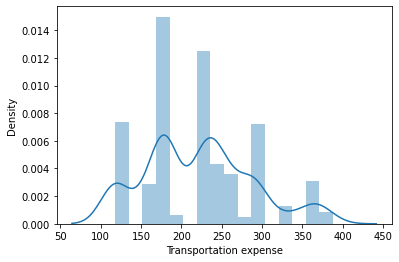

In [120]:
sns.distplot(absent_data['Transportation expense'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


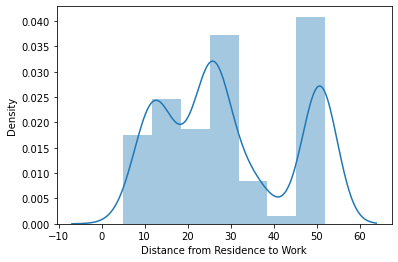

In [121]:
sns.distplot(absent_data['Distance from Residence to Work'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


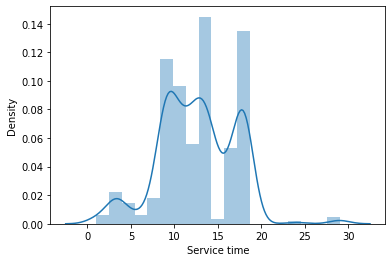

In [122]:
sns.distplot(absent_data['Service time'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


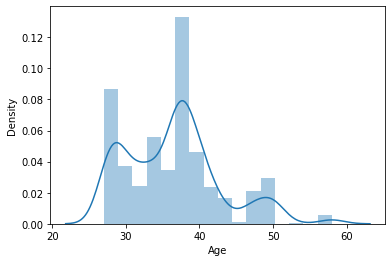

In [123]:
sns.distplot(absent_data['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


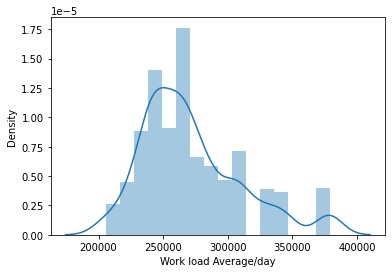

In [124]:
sns.distplot(absent_data['Work load Average/day'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


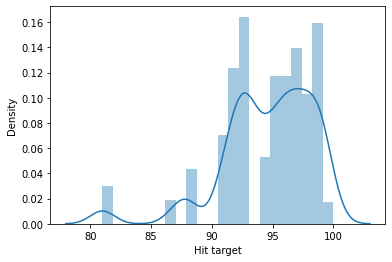

In [125]:
sns.distplot(absent_data['Hit target'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


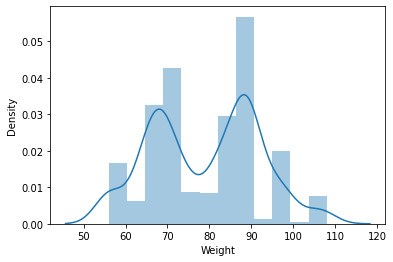

In [126]:
sns.distplot(absent_data['Weight'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


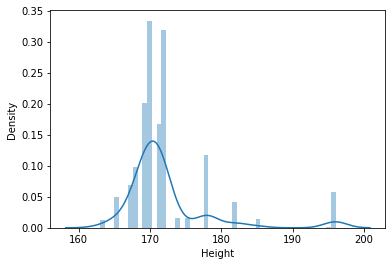

In [127]:
sns.distplot(absent_data['Height'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


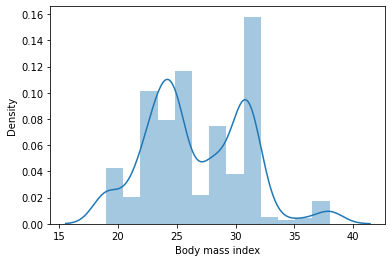

In [128]:
sns.distplot(absent_data['Body mass index'])

In [129]:
absent_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,271490.235135,...,0.052703,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,39058.116188,...,0.223590,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


We can observe that all continuous variables have skewed distributions

### Column [Reason for Absence] , [Month of absence] , [Disciplinary failure] , [Education] , [Son] , [Social drinker], [Social Smoker],[Pet] needs to be converted to float64 data type   

In [130]:
convert_list = ["Reason for absence",   "Disciplinary failure" , "Education" , "Son" , "Social drinker",
                "Social smoker" , "Pet"]

for col_name in convert_list:
  absent_data[col_name] =  absent_data[col_name].astype('float64')                  


In [131]:
#display the current state of the database
absent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    float64
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

## Columns [Day of the Week] , [Work load Average/day] should be of the type int64, so we will need to convert that to proper datatype.



In [132]:
convert_list = ["Day of the week" , "Work load Average/day", "Seasons", "Month of absence"]

for col in convert_list:
  absent_data[col] = absent_data[col].astype('int64')

In [133]:
absent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    float64
 9   Work load Average/day            740 non-null    int64  
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

# Now we will save the prepocessed data file into XLSX format

In [134]:
output = pd.ExcelWriter("Absentism_at_work_preprocessed.xlsx")
absent_data.to_excel(output)
output.save()


In [135]:
import calendar

## Now We have imputed all the missing Values in the dataset. Our dataset now has no noisy data now we can move on to the next part of the SEMMA methodology and try to get insights into the dataset

In [136]:
#We already saw there are a lot of categorical columns encoded as int or float64 we need to create a mapping for them
#categorical columns to better help visalizing the data

# Adding Season names:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
absent_data['Seasons_text'] = absent_data["Seasons"].map(season_mapping).astype('category')

# Adding Month names abbrevations:
absent_data['Month of absence_text'] =  absent_data['Month of absence'].apply(lambda x: calendar.month_abbr[x])

# Adding day names abbrevations:
absent_data['Day of the week_text'] =  absent_data['Day of the week'].apply(lambda x: calendar.day_abbr[x-2])
# calendar has 0: Monday, but I have 2: Monday


In [137]:
#mapping Reason for absence to orignal provided resaons
# Adding reasons value:
reason_mapping = {
    0: 'Not available',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}

absent_data['Reason for absence_text'] = absent_data['Reason for absence'].map(reason_mapping)
absent_data['Reason for absence_text'] = absent_data['Reason for absence_text'].astype('category')

In [138]:
# Adding Education:
education_mapping = {
    1: '1. High School',
    2: '2. Graduate',
    3: '3. Post Graduate',
    4: '4. Master & Doctor'
}
absent_data['Education_text'] = absent_data['Education'].map(education_mapping)
absent_data['Education_text'] = absent_data['Education_text'].astype('category')

# smoker and drinker are boolean
absent_data['Social smoker_text'] = absent_data['Social smoker'].astype('bool')
absent_data['Social drinker_text'] = absent_data['Social drinker'].astype('bool')
absent_data['Disciplinary failure_text'] = absent_data['Disciplinary failure'].astype('bool')

# Now ds contains categorical data twice.
# I drop the old columns, but before I keep save of everything
# in ds_explore: I use it for data exploration 

absent_data_explore = absent_data.copy()


# I check the firsts rows:
absent_data_explore.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Body mass index,Absenteeism time in hours,Seasons_text,Month of absence_text,Day of the week_text,Reason for absence_text,Education_text,Social smoker_text,Social drinker_text,Disciplinary failure_text
0,11,26.0,7,3,1,289.0,36.0,13.0,33.0,239554,...,30.0,4.0,Summer,Jul,Tue,Unjustified absence,1. High School,False,True,False
1,36,0.0,7,3,1,118.0,13.0,18.0,50.0,239554,...,31.0,0.0,Summer,Jul,Tue,Not available,1. High School,False,True,True
2,3,23.0,7,4,1,179.0,51.0,18.0,38.0,239554,...,31.0,2.0,Summer,Jul,Wed,Medical consultation,1. High School,False,True,False
3,7,7.0,7,5,1,279.0,5.0,14.0,39.0,239554,...,24.0,4.0,Summer,Jul,Thu,Diseases of the eye and adnexa,1. High School,True,True,False
4,11,23.0,7,5,1,289.0,36.0,13.0,33.0,239554,...,30.0,2.0,Summer,Jul,Thu,Medical consultation,1. High School,False,True,False


## 3. Exploratory Data Analysis
Sometimes simple plotting can help understanding how to proceed. I analyze the distribution of Absenteeism time in hours and then we try to undestrand the relationships between the other features.

In [139]:
# Useful for visualization
def level(absh):
  if(absh < 2):
    lev = 'late'
  elif((absh >= 2) and (absh < 8)):
    lev = 'hours'
  elif(absh >= 8):
    lev = 'days'    
  return lev

absent_data_explore['abs_lev'] = absent_data_explore['Absenteeism time in hours'].apply(lambda x: level(x)).astype('category')

Text(0, 0.5, 'Frequency')

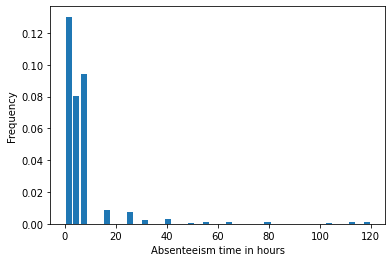

In [140]:
# Plotting absenteeism hours 
bins = 40
fig, ax = plt.subplots()
ax.hist(absent_data_explore['Absenteeism time in hours'], bins, rwidth=0.8, density = True)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

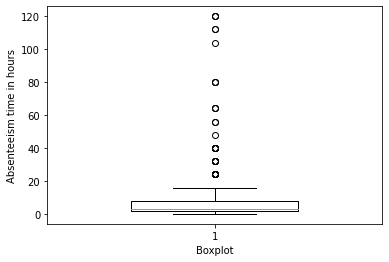

In [141]:
# boxplot of Absenteeism time. 
plt.boxplot(absent_data_explore['Absenteeism time in hours'], widths = 0.5)
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Boxplot')
plt.show()

# Clearly, in Abseteeism time in hours there is a great presence of outliers. It seems there are few observations particularly unusual.

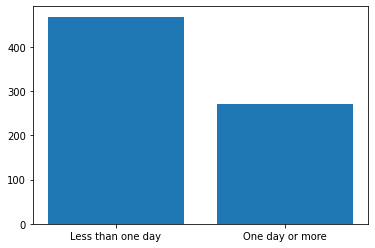

In [142]:
# Plotting absence 
time = absent_data_explore['Absenteeism time in hours']
hours = np.count_nonzero(time < 8)
days = np.count_nonzero(time >= 8)
x = np.array(['Less than one day', 'One day or more'])
y = np.array([hours, days])
plt.bar(x, y)
plt.show()

# The dataset is clearly unbalanced: the number of records of the classes can be too different. I will solve this issue with oversampling later.

Reason and Abseetism Correlation
A very important feature is Reason of absence. Let's analyze which reasons are most related to each level of absence.

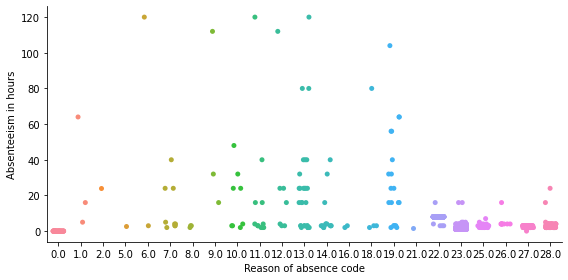

In [143]:
# Plot of Absenteeism time in hours with Reason for absence. 
sns.catplot(x = 'Reason for absence', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Reason of absence code", 'Absenteeism in hours')


Recalling the coding on the reasons for absence reported at the beginning, we note for example that practically all absences whit reason = 0 (i.e. Not available) refer to late. We had already noticed this in the Data Preprocessing section.

We also notice that the Reason of absence codes for hours are mainly distributed from 22 to 28, corresponding to no International Code of Diseases (ICD), i.e. not illnesses or insults, but check-ups, medical consultations and others.

On the contrary, for absences of a day or more, the reason is often a serious medical problem.

Let's see, for each Reason, how records are distribuited among the levels of absence.


In [144]:
# Main absence for abs_lev = late
reason_abs_lev = absent_data_explore.groupby('Reason for absence_text')['abs_lev'].value_counts().unstack().fillna(0).astype(int)
reason_abs_lev.sort_values(by = ['late'], ascending = False).head()

,days,hours,late
Reason for absence_text,,,
Medical consultation,2,98,88
Not available,0,0,43
Physiotherapy,0,66,1
Certain conditions originating in the perinatal period,0,2,0
Factors influencing health status and contact with health services,0,1,0


In [145]:
# Main absence for abs_lev = hours
reason_abs_lev.sort_values(by = ['hours'], ascending = False).head()

,days,hours,late
Reason for absence_text,,,
Medical consultation,2,98,88
Dental consultation,2,76,0
Physiotherapy,0,66,1
Laboratory examination,0,26,0
Diseases of the musculoskeletal system and connective tissue,17,11,0


In [146]:
# Main absence for abs_lev = days
reason_abs_lev.sort_values(by = ['days'], ascending = False).head()



,days,hours,late
Reason for absence_text,,,
Patient follow-up,209,4,0
Diseases of the musculoskeletal system and connective tissue,17,11,0
"Injury, poisoning and certain other consequences of external causes",14,6,0
Diseases of the skin and subcutaneous tissue,4,3,0
Diseases of the digestive system,4,7,0


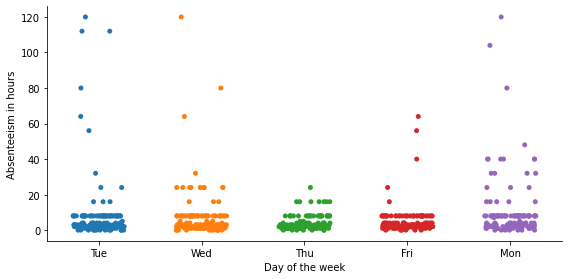

In [147]:


# DAY OF THE WEEK
# Distribution of days for level of absence
sns.catplot(x = 'Day of the week_text', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Day of the week", 'Absenteeism in hours')



In [148]:


days_abs_lev = absent_data_explore.groupby('Day of the week')['abs_lev'].value_counts().unstack().fillna(0).astype(int)
days_abs_lev



,days,hours,late
Day of the week,,,
2,75,63,23
3,58,60,36
4,60,69,27
5,36,64,25
6,42,81,21


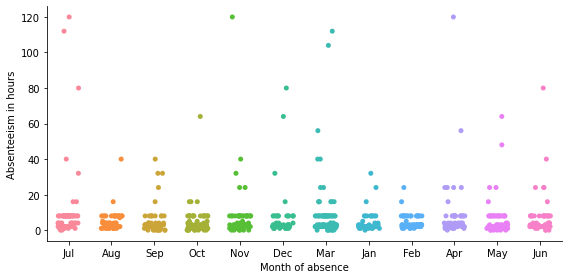

In [149]:


# MONTH OF ABSENCE
# Distribution of month for level of absence
sns.catplot(x = 'Month of absence_text', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Month of absence", 'Absenteeism in hours')



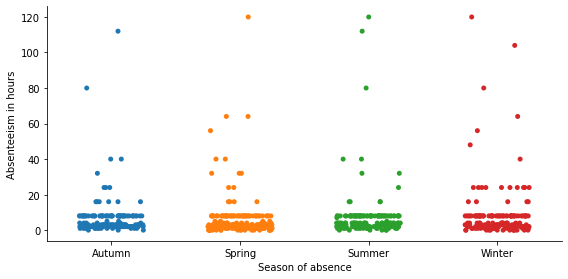

In [150]:


# SEASON OF ABSENCE
# Distribution of month for level of absence
sns.catplot(x = 'Seasons_text', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Season of absence", 'Absenteeism in hours')



# Personal and Family Reasons Exploration

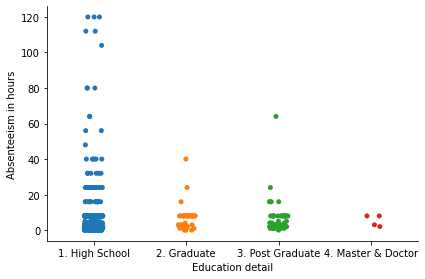

In [151]:


# EDUCATION 
sns.catplot(x = 'Education_text', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 1.5).set_axis_labels("Education detail", 'Absenteeism in hours')



In [152]:

# Employees per education
absent_data_explore.groupby('Education_text')['ID'].nunique()



Education_text
1. High School        29
2. Graduate            4
3. Post Graduate       3
4. Master & Doctor     1
Name: ID, dtype: int64

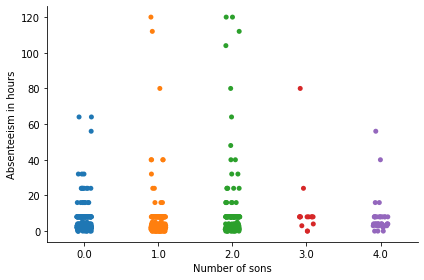

In [153]:
# SON
sns.catplot(x = 'Son', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 1.5).set_axis_labels("Number of sons", 'Absenteeism in hours')



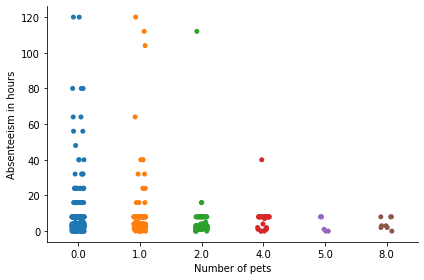

In [154]:
# PETS
sns.catplot(x = 'Pet', y = 'Absenteeism time in hours', 
            data = absent_data_explore,
            height = 4,
            aspect = 1.5).set_axis_labels("Number of pets", 'Absenteeism in hours')


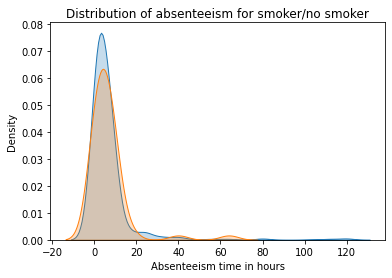

In [155]:
# SMOKER
abs_smoker = absent_data_explore[absent_data_explore['Social smoker'] == 0].loc[:,'Absenteeism time in hours']
sns.kdeplot(abs_smoker, shade = True, label = 'No smoker'
            ).set_title('Distribution of absenteeism for smoker/no smoker')
abs_smoker = absent_data_explore[absent_data_explore['Social smoker'] == 1].loc[:,'Absenteeism time in hours']            
sns.kdeplot(abs_smoker, shade = True, label = 'Smoker'
            )

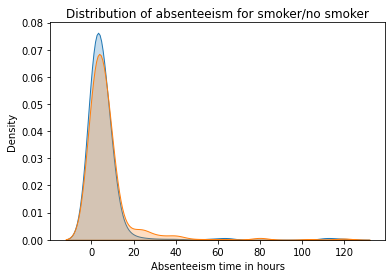

In [156]:
# DRINKER
abs_smoker = absent_data_explore[absent_data_explore['Social drinker'] == 0].loc[:,'Absenteeism time in hours']
sns.kdeplot(abs_smoker, shade = True, label = 'No drinker'
            ).set_title('Distribution of absenteeism for smoker/no smoker')
abs_smoker = absent_data_explore[absent_data_explore['Social drinker'] == 1].loc[:,'Absenteeism time in hours']            
sns.kdeplot(abs_smoker, shade = True, label = 'drinker'
            )

In [157]:
absent_data_explore.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,20.755405,6.324324,3.914865,2.544595,221.329730,29.664865,12.554054,36.450000,271490.235135,...,0.052703,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.110811,26.678378,6.924324
std,11.021247,7.071903,3.414956,1.421675,1.111831,66.952223,14.856958,4.384873,6.478772,39058.116188,...,0.223590,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.031370,4.286343,13.330998
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,22.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,22.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,23.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Correlation Analysis Matrix 

In [158]:
# Correlation matrix 
# I drop categorical attributes and we will normalize it normalize
ds_num = absent_data_explore.drop(columns = ['ID', 'Disciplinary failure_text', 'Social drinker_text', 'Social smoker_text', 'Seasons_text', 
                            'Month of absence_text', 'Day of the week_text', 'Reason for absence_text', 'Education_text','abs_lev'])


In [159]:
ds_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    float64
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    float64
 5   Distance from Residence to Work  740 non-null    float64
 6   Service time                     740 non-null    float64
 7   Age                              740 non-null    float64
 8   Work load Average/day            740 non-null    int64  
 9   Hit target                       740 non-null    float64
 10  Disciplinary failure             740 non-null    float64
 11  Education                        740 non-null    float64
 12  Son                   

Text(0.5, 1.0, 'Correlation Heatmap')

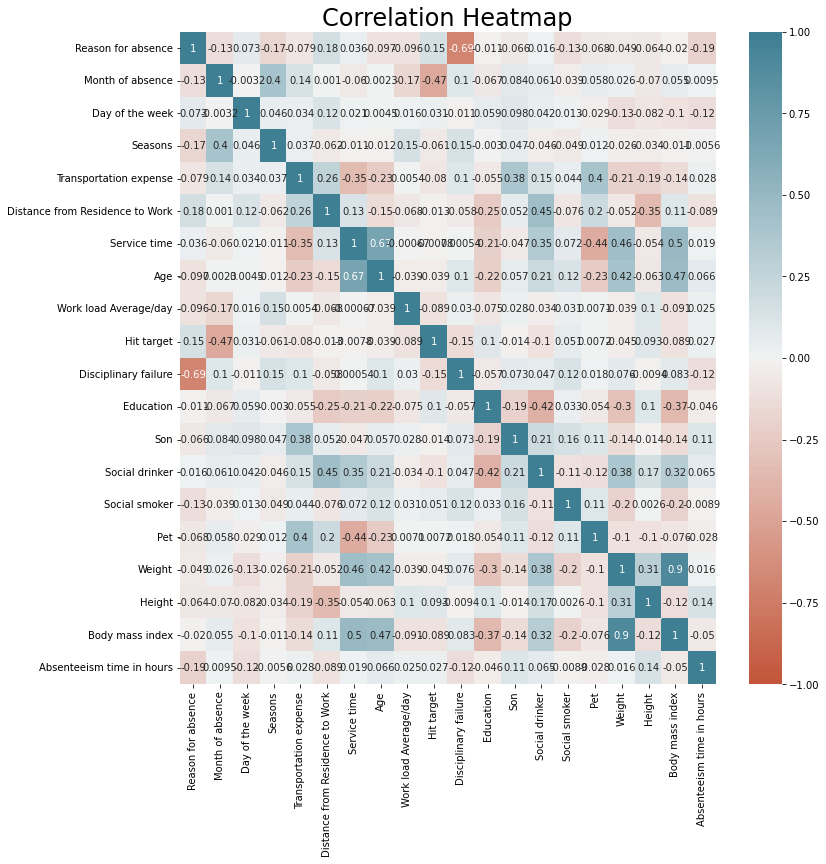

In [160]:
ds_norm = (ds_num-ds_num.mean())/ds_num.std()
corr = ds_norm.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Correlation Heatmap', fontsize = 24)



Some features are being highlighted in the heatmap. Let's have a look to the more intresting. However, strong correlation among bmi, height and weight and between distance and transport expences may suggest to remove some feature.

    Strong positive correlation between Age and Service time.
    Positive correlation between Service time and bmi (and so Weight).
    Negative correlation between Transport expences and Service time.
    Negative correlation between Service time and number of Pet.
    Positive correlation between Transport expense and number of pets and son.

We notice that no feature have strong negative or positive correlation with Absenteeism time in hours. We have to go deeper. What is more, clearly in the heatmap they are not considered the categorical data.

We would like to reduce dimensionality in order to make our algorithm more agile but this has to be made by paying attention to not losing information.

We have seen that bmi and weight have a very strong correlation: 0.9. This was expected, considering how it is calculated:
bmi = weight/height**2


# We can say that we don't lose information by removing one of the two. Since also height is in my dataset, We decide to drop weight.

In [161]:
absent_data = absent_data.drop(columns = 'Weight')

# 4. Data Preparation Stage

Now that we have done data preprocessing we will begin preparing our data for model fitting and evaluation.


In order to make prediction, I would like to be as specific as possible and therefore to make a classification that is well suited to the application case. I want to divide the values of Absenteeism in hours, considering the effective time of absence. Considering a work day of 8 hours and I split the set in three labels:

    late: if the absence lasts strictly less than 2 hours
    hours: if the absence was for about less than a work day
    days: if the absence was for one day or more **bold text**



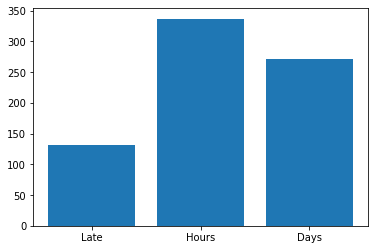

In [162]:
# Plotting absence last
time = absent_data['Absenteeism time in hours']
late = np.count_nonzero(time < 2)
days = np.count_nonzero(time >= 8)
hours = np.count_nonzero(time >= 2) - days
x = np.array(['Late', 'Hours', 'Days'])
y = np.array([late, hours, days])
plt.bar(x, y)
plt.show()



On the other hand, watching at the distribution of the dataset, we can expect that applying such a division the models will not perform at their best.

We can have better performance (and therefore more safety) using only two classes. we apply binary classification and we try to predict absense that last one day ore more.


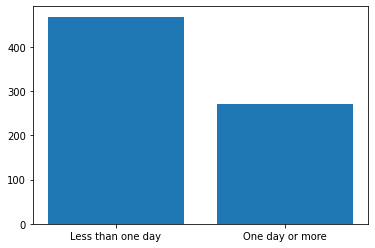

In [163]:
# Plotting absence last
time = absent_data['Absenteeism time in hours']
less = np.count_nonzero(time < 8)
more = np.count_nonzero(time >= 8)
x = np.array(['Less than one day', 'One day or more'])
y = np.array([less, more])
plt.bar(x, y)
plt.show()



In [164]:
# Create label for Abseentism Hours

# Classes for full classification
def level(absh):
  if(absh < 2):
    lev = 'late'
  elif((absh >= 2) and (absh < 8)):
    lev = 'hours'
  elif(absh >= 8):
    lev = 'days'    
  return lev

# Classes for binary classification
def level_day(absh):
  if(absh < 8):
    day = 'less'
  elif(absh >= 8):
    day = 'more'    
  return day

absent_data['abs_lev'] = absent_data['Absenteeism time in hours'].apply(lambda x: level(x)).astype('category')
absent_data['abs_day'] = absent_data['Absenteeism time in hours'].apply(lambda x: level_day(x)).astype('category')

absent_data.head()



,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Seasons_text,Month of absence_text,Day of the week_text,Reason for absence_text,Education_text,Social smoker_text,Social drinker_text,Disciplinary failure_text,abs_lev,abs_day
0,11,26.0,7,3,1,289.0,36.0,13.0,33.0,239554,...,Summer,Jul,Tue,Unjustified absence,1. High School,False,True,False,hours,less
1,36,0.0,7,3,1,118.0,13.0,18.0,50.0,239554,...,Summer,Jul,Tue,Not available,1. High School,False,True,True,late,less
2,3,23.0,7,4,1,179.0,51.0,18.0,38.0,239554,...,Summer,Jul,Wed,Medical consultation,1. High School,False,True,False,hours,less
3,7,7.0,7,5,1,279.0,5.0,14.0,39.0,239554,...,Summer,Jul,Thu,Diseases of the eye and adnexa,1. High School,True,True,False,hours,less
4,11,23.0,7,5,1,289.0,36.0,13.0,33.0,239554,...,Summer,Jul,Thu,Medical consultation,1. High School,False,True,False,hours,less


In [165]:
X = absent_data.drop(columns = ['abs_lev', 'abs_day', 'Absenteeism time in hours'])
y = absent_data['abs_lev']
y_day = absent_data['abs_day']
y_int = absent_data['Absenteeism time in hours']



# 4.1 Data Relabeling


Apart from the target variabile, the dataset we use has now 10 numerical features and 8 categorical feature. Among the categorical feature, 4 of them are binary and 4 are nominal.


There is something to do in order to work with the nominal values. The original dataset applies label encoding: nominal values are encoded as integer positive values.


The problem is that numerical values implies an order, but clearly we can't say that Summer is bigger than Winter or that Diseases of the nervous system is smaller than Diseases of the respiratory system. This tecnique can be useful in when applied to values that can be ordedered or have some sort of heriarchy, for example Education can be seen as the Level of education and so an order could make sense. Anyway, this is not the case for most of the nominal features here.


To overcame this problem, the most commonly technique used is one hot encoding. Each category value is converted into a new column: we assign 1 to the corresponding value and 0 to everything else.


Appling it here, this implies adding about 50 new columns: one for each levels of each categorical attribute. In general, this can't be ignored and made straigthforward.


We can try reducing dimensionality by removing some of the features. By prevision exploration, We can say that some data can be redundant. In particular, we have seen that the month of absence does not seem to be information particularly linked to the duration of absenteeism. Since this feature involves adding 12 columns and that we already have the feature on the season, We decide not to consider the month in the analysis.

However, we still have a lot of columns.


In [166]:
# label_encoder object knows how to understand word labels. 

Z = X.copy()
label_encoder = preprocessing.LabelEncoder() 

ylabel = label_encoder.fit_transform(y)
levels = label_encoder.inverse_transform(list(set(ylabel)))
ybin = label_encoder.fit_transform(y_day)
bin_levels = label_encoder.inverse_transform(list(set(ybin)))

# ONE HOT ENCODING
# Adding the new columns
#Z = pd.concat([Z,pd.get_dummies(Z['month_name'], prefix = 'month')], axis=1)
Z = pd.concat([Z,pd.get_dummies(Z['Reason for absence_text'], prefix = 'Reason for absence')], axis=1)
Z = pd.concat([Z,pd.get_dummies(Z['Day of the week_text'], prefix = 'Day of the week')], axis=1)
Z = pd.concat([Z,pd.get_dummies(Z['Seasons_text'], prefix = 'Seasons')], axis=1)
Z = pd.concat([Z,pd.get_dummies(Z['Education_text'], prefix = 'Education')], axis=1)
# Removing the old nominal variables
Z.drop(['Reason for absence_text'],axis=1, inplace=True)
Z.drop(['Month of absence_text'],axis=1, inplace=True)
Z.drop(['Day of the week_text'],axis=1, inplace=True)
Z.drop(['Seasons_text'],axis=1, inplace=True)
Z.drop(['Education_text'],axis=1, inplace=True)
Z.drop(['ID'],axis=1, inplace=True)

# 4.2 Principal Component Analysis.

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to reduce data dimensionality. This occurs through a linear transformation of the variables that projects the original ones into a new Cartesian system in which the new variable with the greatest variance is projected on the first axis, the new variable, the second for the size of the variance, on the second axis and so on.

In [167]:

X_pca = Z.copy()
# Normalize:
X_pca_norm = (X_pca-X_pca.mean())/X_pca.std()
print("There are " + ("some" if X_pca_norm.isnull().values.any() else "no")  + " null/missing values in the dataset.")



There are no null/missing values in the dataset.


Text(0, 0.5, 'Variance explained')

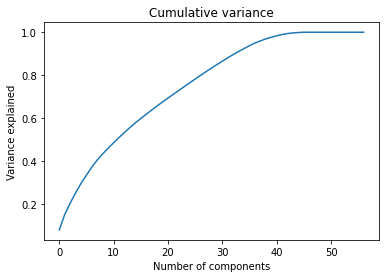

In [168]:
# calculate the principal components
X_pca = PCA(random_state = SEED).fit(X_pca_norm)
cumvar = np.cumsum(X_pca.explained_variance_ratio_)
#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')



In [169]:
cumvar[36]

0.9500166156724932

The cumulative variance plot show us that we can cover about the 90% of the variance by using the first 36 principal components. We decide to use them.

In [170]:
n_used = 36
X_pca = np.dot(X_pca_norm.values, X_pca.components_[:n_used,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_used)])
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,-1.245143,-1.583793,-0.167487,1.497178,2.271577,-0.688945,1.472131,0.898333,-0.053906,-0.728386,...,0.673096,-1.233644,-2.416899,-1.944604,1.112442,2.697607,-1.951875,-1.327631,-2.237760,0.022021
1,-3.980184,4.794096,4.368843,-1.670791,1.957601,-0.809063,3.602525,0.638541,1.030343,-1.304869,...,-0.587269,-0.030654,0.309285,-0.215921,-0.025288,-0.611420,-0.493140,0.360584,-0.561801,-0.298840
2,-1.629102,-1.946212,0.312988,-0.426499,0.794179,0.487242,2.005732,-0.169997,-0.077642,1.402065,...,-0.007905,0.152938,0.392703,-0.557349,-0.092561,-0.426925,-0.406573,0.012233,0.327890,0.421884
3,-0.418435,1.451824,1.754152,3.165497,0.406829,2.967880,0.952988,-0.305570,-0.464252,2.136594,...,-3.493442,0.694701,0.021482,-1.332701,0.468422,0.807881,-1.620444,0.741343,-2.253929,-1.516441
4,-1.198701,-1.364494,-0.623838,1.263573,0.122195,0.000387,2.332727,-0.015121,0.515017,0.808918,...,-0.323270,0.516878,-0.066507,-0.726489,-0.510579,0.642561,0.207071,1.129308,-0.064678,-0.180967



#Now We split the set in two subsets:

    Training set: collection of labelled data objects used to learn

the classification model

    Test set: Collection of labelled data objects used to

validate the classification model

We use 70% of data as training set and 30% for tests.


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, ylabel, test_size = 0.3, random_state = SEED, stratify = ylabel)
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X_pca, ybin, test_size = 0.3, random_state = SEED, stratify = ybin)

# 4.3 Oversampling and Synthetic Data Generation

As discussed before, in the classification setting the dataset is heavily skewed towards low level of absenteeism and our classes are strongly unbalanced. We can solve this by oversamplig.

There are three common techniques to do this:

#The simplest is Random oversampling: it simply generates randomly new samples in the classes which are under-represented.

#SMOTE (Synthetic Minority Oversampling Technique): take a sample from the dataset, and consider its nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those neighbors, and the current data point. Multiply this vector by a random number which lies between , and Add this to the current data point to create the new, synthetic data point.

#ADASYN (ADAptive SYNthetic sampling approach) algorithm, builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.


In [172]:
# GENERATING NEW DATASET WITH RANDOM OVERSAMPLING
X_train_ROS, y_train_ROS = RandomOverSampler(random_state = SEED).fit_resample(X_train, y_train)

In [173]:
# GENERATING NEW DATASET WITH SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE(random_state = SEED).fit_resample(X_train, y_train)

In [174]:
# GENERATING NEW DATASET WITH ADASYN
X_train_ADASYN, y_train_ADASYN = ADASYN(random_state = SEED, sampling_strategy = 'not majority').fit_resample(X_train, y_train)

In [175]:
y_set = {'simple': y_train, 'ROS': y_train_ROS, 'SMOTE': y_train_SMOTE, 'ADASYN': y_train_ADASYN}
for ys in y_set.keys():
  print('The', ys, 'train set has:')
  for i in set(ylabel):    
          print('\t', np.count_nonzero(y_set[ys] == i), 'records with label',levels[i])



The simple train set has:
	 190 records with label days
	 236 records with label hours
	 92 records with label late
The ROS train set has:
	 236 records with label days
	 236 records with label hours
	 236 records with label late
The SMOTE train set has:
	 236 records with label days
	 236 records with label hours
	 236 records with label late
The ADASYN train set has:
	 220 records with label days
	 236 records with label hours
	 233 records with label late


With this we have completed our Data Sampling and generation steps. Now on we start with the next steps in SEMMA that is Model fitting and evaluation.

# 5. Classification MODEL Evaluation

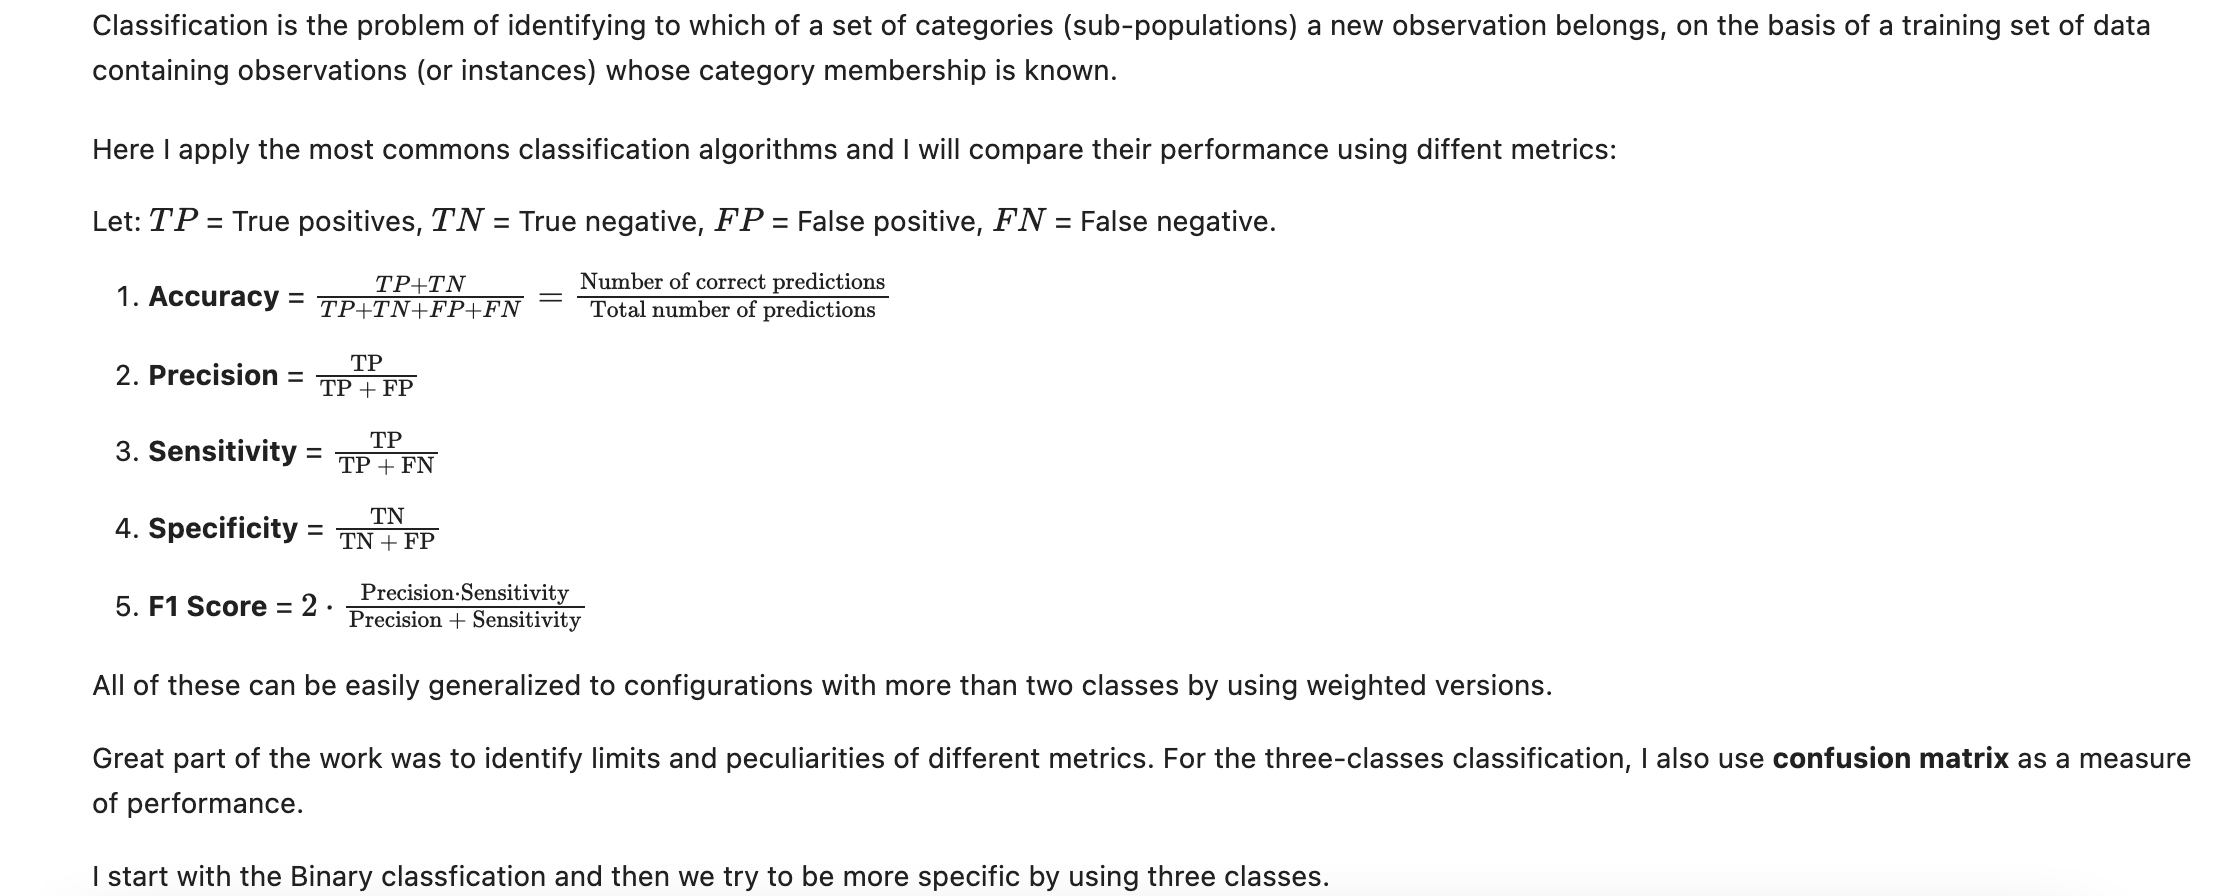

#Binary Classification 

1. Decision Tree

In [176]:
binary_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

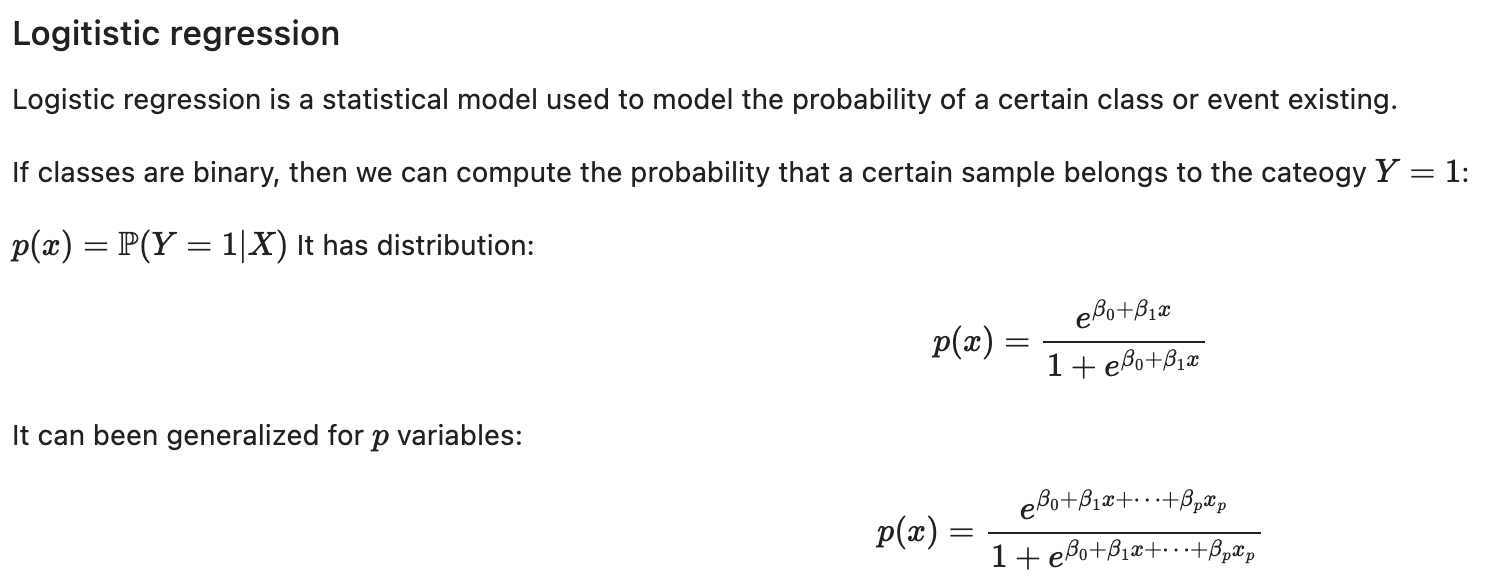

In [177]:
# Logistic regression
logistic = LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs')
logistic.fit(Xbin_train, ybin_train)
logistic_predict = logistic.predict(Xbin_test)
logi_acc = accuracy_score(logistic_predict, ybin_test)
logi_preci = precision_score(logistic_predict, ybin_test)
logi_sensitivity = recall_score(logistic_predict, ybin_test)
logi_f1 = f1_score(logistic_predict, ybin_test)
binary_metrics.loc["Logistic regression"] = [logi_acc,logi_preci,logi_sensitivity,logi_f1]
binary_metrics.loc["Logistic regression"] 

Accuracy       0.950450
Precision      0.925926
Sensitivity    0.937500
F1 Score       0.931677
Name: Logistic regression, dtype: float64

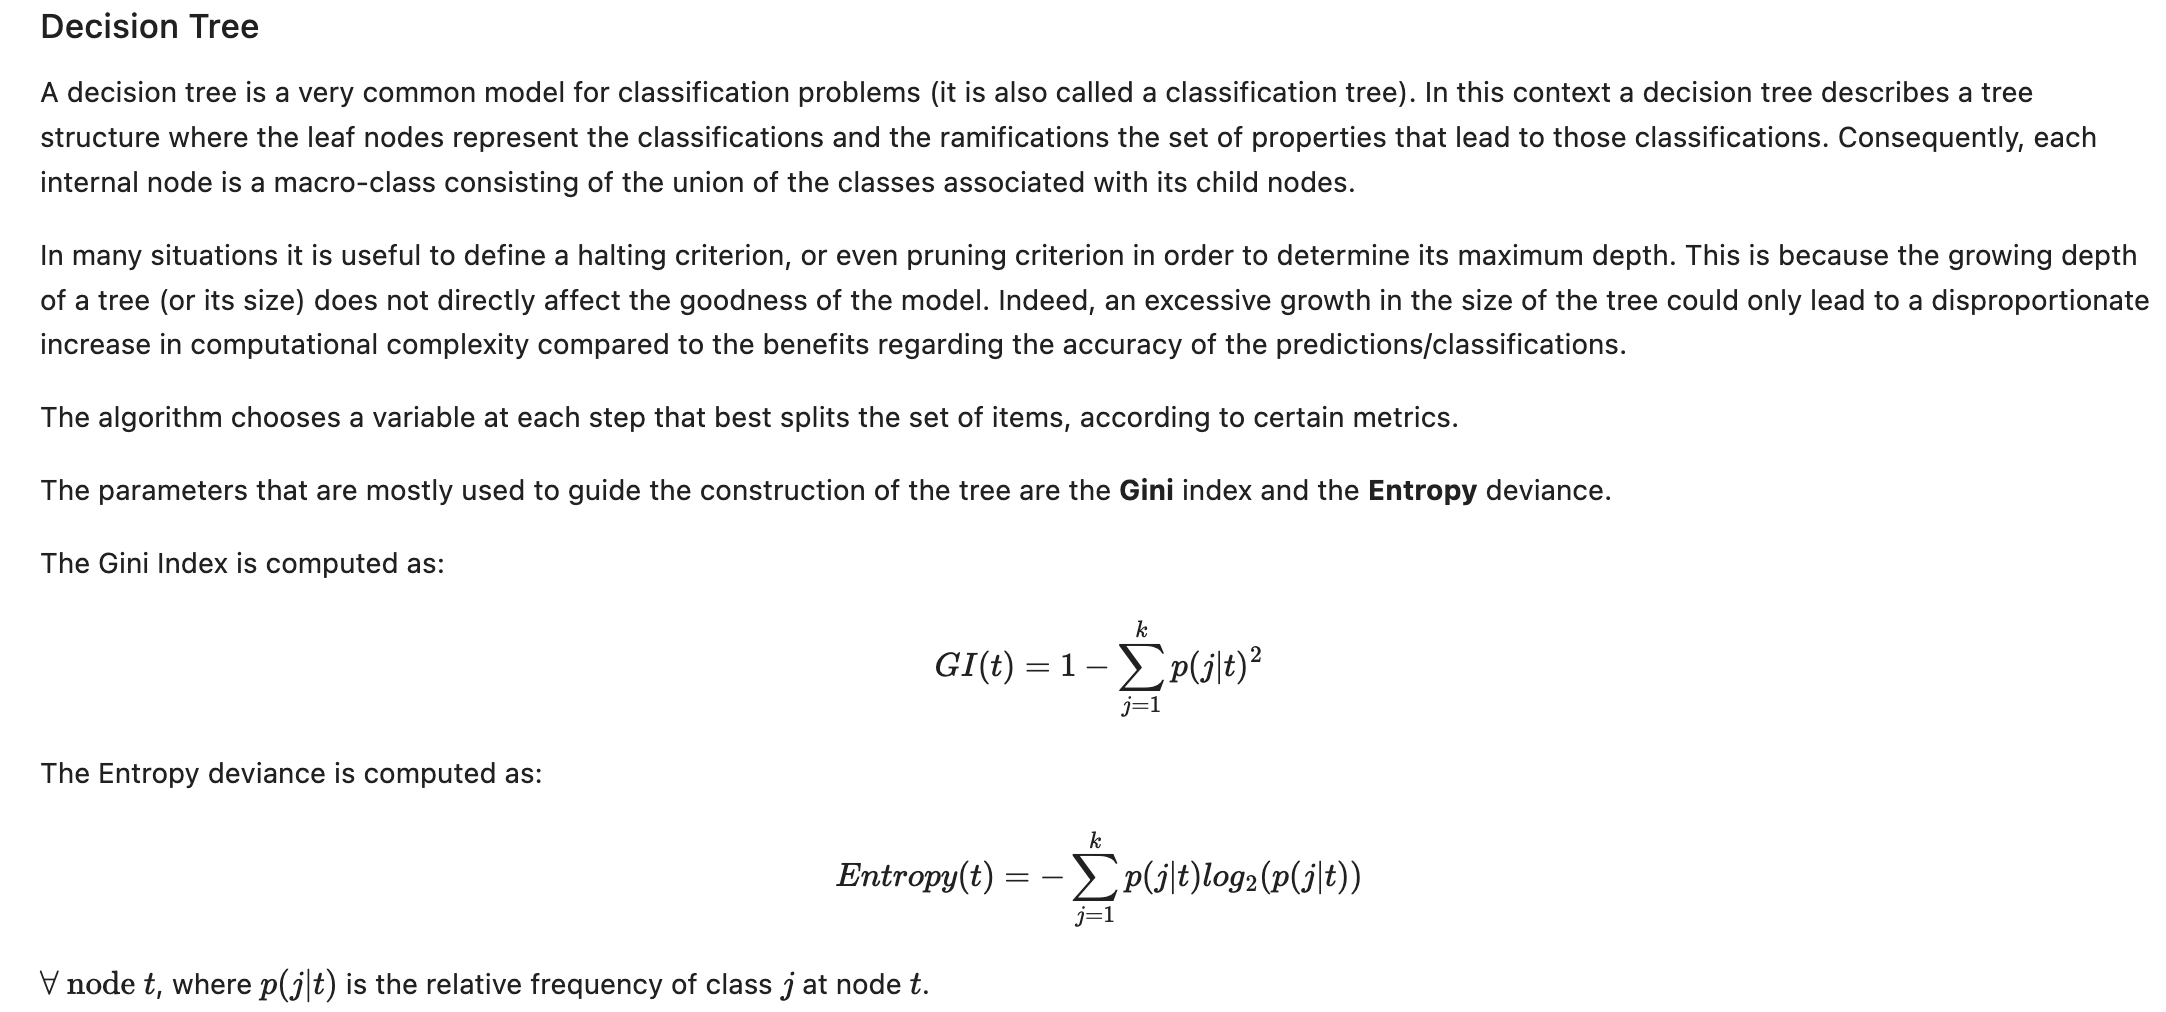

In [179]:
# Decision Tree

depth = np.arange(4, 20) # for trees and forests
parameters = {'max_depth': depth}

## Entropy criterion
tree_Entropy = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy', random_state = SEED), parameters, scoring = 'f1')
tree_Entropy = tree_Entropy.fit(Xbin_train, ybin_train)
tree_Entropy_pred = tree_Entropy.predict(Xbin_test)
tree_acc = accuracy_score(tree_Entropy_pred, ybin_test)
tree_preci = precision_score(tree_Entropy_pred, ybin_test)
tree_sensitivity = recall_score(tree_Entropy_pred, ybin_test)
tree_f1 = f1_score(tree_Entropy_pred, ybin_test)
binary_metrics.loc["Tree Entropy"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]
print("The best parameters for Entropy Decison Tree are %s with a score of %0.2f" % (tree_Entropy.best_params_, tree_Entropy.best_score_))
binary_metrics.loc["Tree Entropy"]

The best parameters for Entropy Decison Tree are {'max_depth': 11} with a score of 0.78


Accuracy       0.860360
Precision      0.802469
Sensitivity    0.812500
F1 Score       0.807453
Name: Tree Entropy, dtype: float64

In [180]:
## Gini criterion
tree_Gini = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'gini', random_state = SEED), parameters, scoring = 'f1')
tree_Gini = tree_Gini.fit(Xbin_train, ybin_train)
tree_Gini_pred = tree_Gini.predict(Xbin_test)
tree_acc = accuracy_score(tree_Gini_pred, ybin_test)
tree_preci = precision_score(tree_Gini_pred, ybin_test)
tree_sensitivity = recall_score(tree_Gini_pred, ybin_test)
tree_f1 = f1_score(tree_Gini_pred, ybin_test)
binary_metrics.loc["Tree Gini"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]
print("The best parameters for Gini Decision Tree are %s with a score of %0.2f" % (tree_Gini.best_params_, tree_Gini.best_score_))
binary_metrics.loc["Tree Gini"] 



The best parameters for Gini Decision Tree are {'max_depth': 6} with a score of 0.75


Accuracy       0.864865
Precision      0.790123
Sensitivity    0.831169
F1 Score       0.810127
Name: Tree Gini, dtype: float64